In [6]:
import importlib
import dataClass #import the module here, so that it can be reloaded.
importlib.reload(dataClass)
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from matplotlib.pyplot import cm
from scipy.optimize import curve_fit

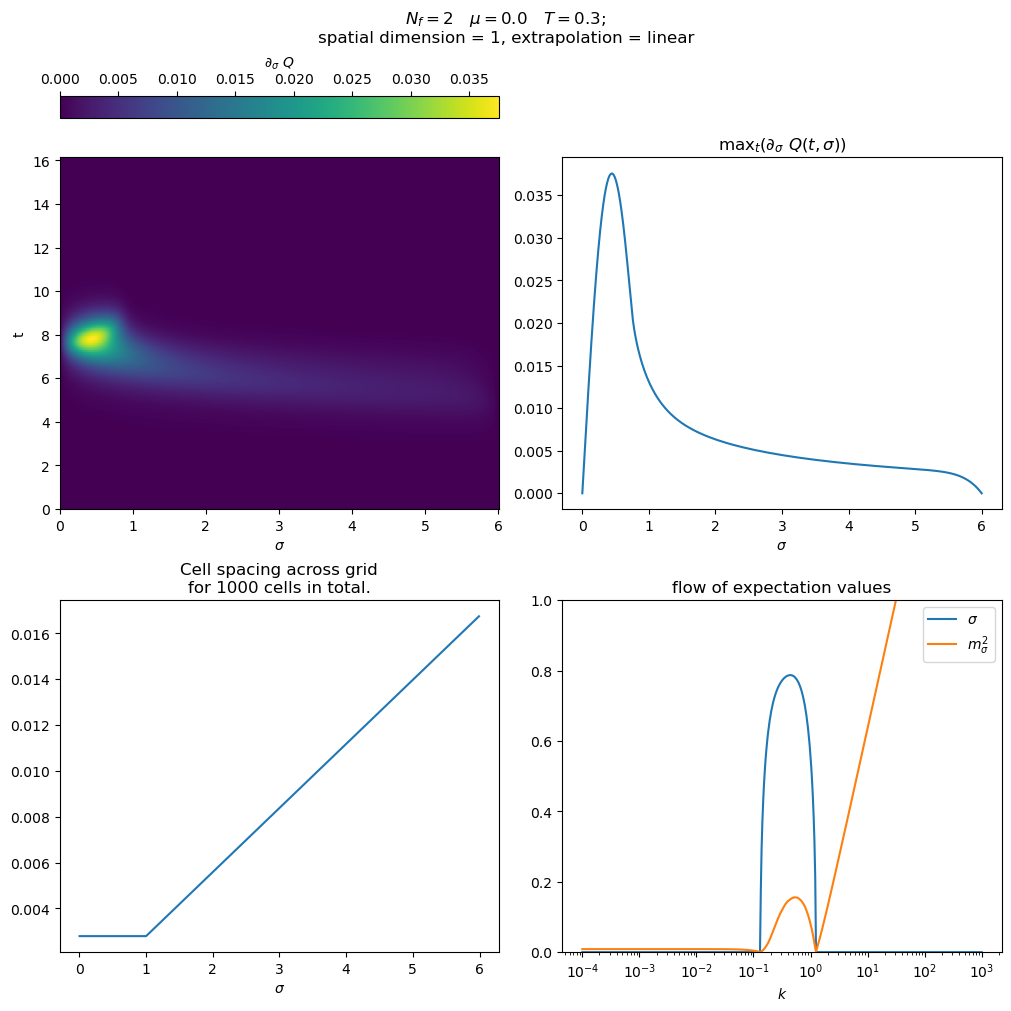

In [12]:
with dataClass.FlowData("./sigma_max_test_1000/d_1_1/mu=0.0_T=0.3_sigmaMax=6.0_Lambda=1000.0_kir=0.0001_nGrid=1000_nFlavor=2_tolerance=1.000000e-12_d=1.hdf5") as f:
    fig, ((diffPlot, maxDiffQ), (gridPlot, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_max_Q_of_x(maxDiffQ)
    f.plot_grid(gridPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    plt.show()
    

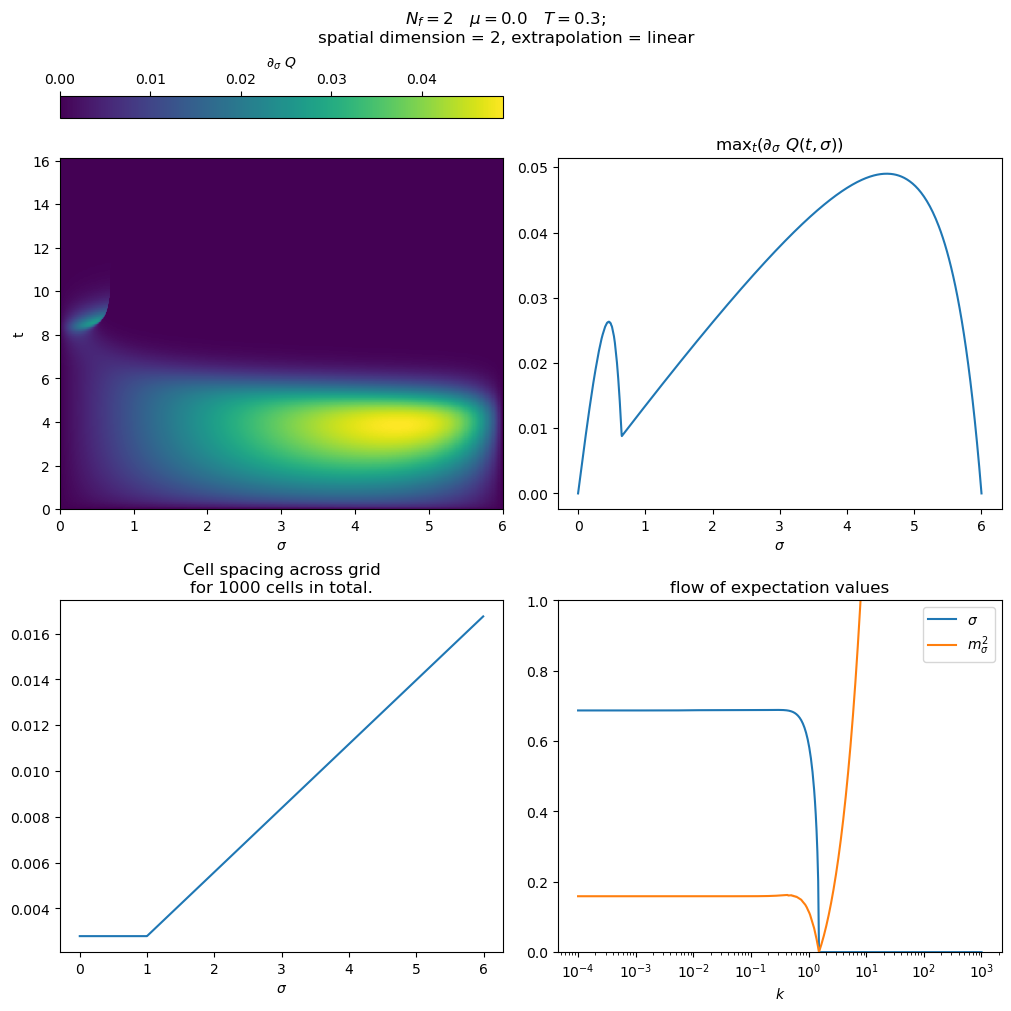

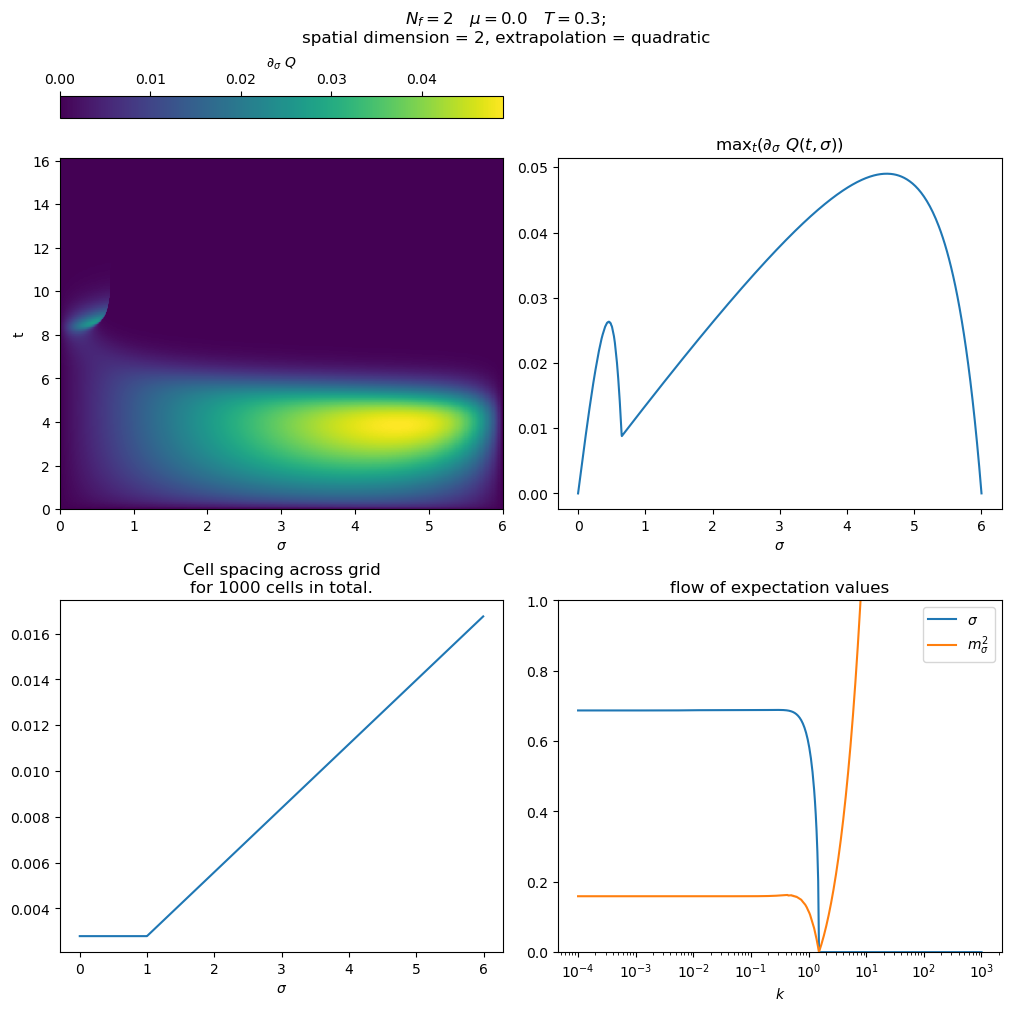

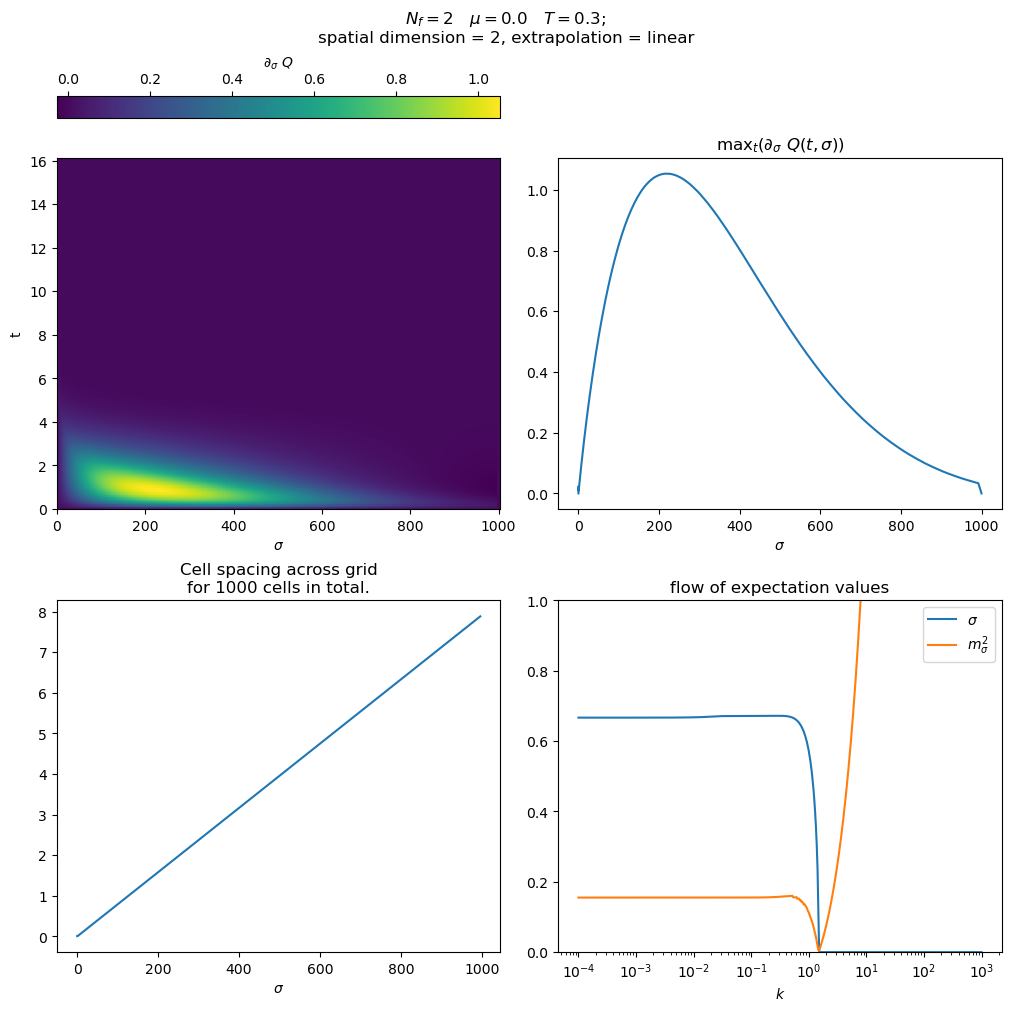

In [33]:
with dataClass.FlowData("./sigma_max_test_1000/d_2_1/mu=0.0_T=0.3_sigmaMax=6.0_Lambda=1000.0_kir=0.0001_nGrid=1000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5") as f:
    fig, ((diffPlot, maxDiffQ), (gridPlot, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_max_Q_of_x(maxDiffQ)
    f.plot_grid(gridPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    plt.show()

with dataClass.FlowData("./sigma_max_test_1000/d_2_2/mu=0.0_T=0.3_sigmaMax=6.0_Lambda=1000.0_kir=0.0001_nGrid=1000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5") as f:
    fig, ((diffPlot, maxDiffQ), (gridPlot, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_max_Q_of_x(maxDiffQ)
    f.plot_grid(gridPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    plt.show()

with dataClass.FlowData("./sigma_max_test_1000/d_2_1/mu=0.0_T=0.3_sigmaMax=1000.0_Lambda=1000.0_kir=0.0001_nGrid=1000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5") as f:
    fig, ((diffPlot, maxDiffQ), (gridPlot, flowObservables)) = plt.subplots(2,2, constrained_layout=True ,figsize=(10,10))
    f.enter_plot_title(fig)
    f.plot_Q(diffPlot)
    f.plot_max_Q_of_x(maxDiffQ)
    f.plot_grid(gridPlot)
    f.plot_sigma_and_msquare_flow(flowObservables)
    plt.show()

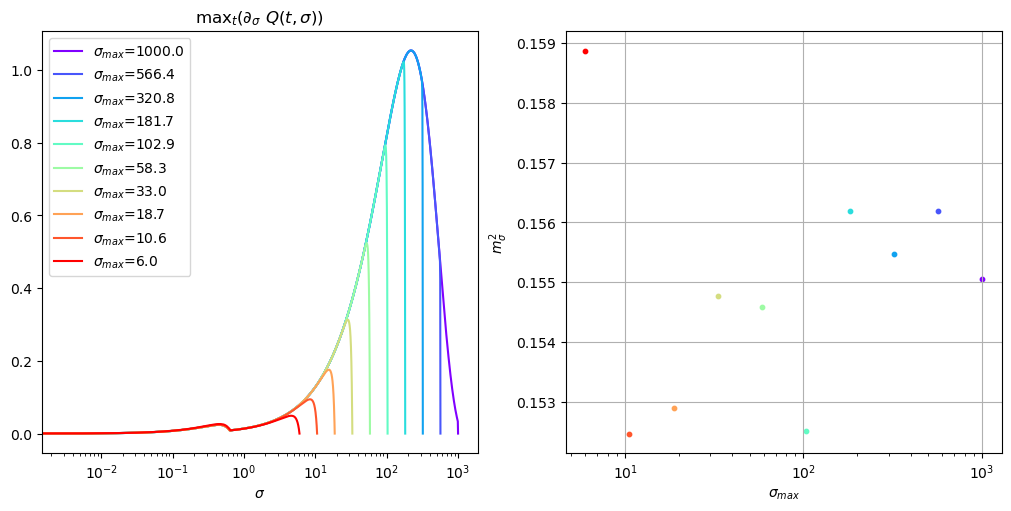

In [34]:
fig, (diffusionPlot, massSquarePlot) = plt.subplots(1, 2, constrained_layout=True ,figsize=(10,5))

all_test = listdir("./sigma_max_test_1000/d_2_1/")
all_test = list(map(lambda x: "./sigma_max_test_1000/d_2_1/"+x, all_test))
sigma_max_values = []
for i, filename in enumerate(all_test):
    with dataClass.FlowData(filename) as f:
        sigma_max_values.append(f.sigma_max)

all_test = zip(all_test, sigma_max_values)
all_test = reversed(sorted(all_test, key = lambda x: x[-1]))
all_test = list(map(lambda x: x[0], all_test))

color = cm.rainbow(np.linspace(0, 1, len(all_test)))

for i, filename in enumerate(all_test):
    with dataClass.FlowData(filename) as f:
        f.plot_max_Q_of_x(diffusionPlot, r'$\sigma_{max}$=' + f'{f.sigma_max:.1f}', color=color[i])
        f.add_massSquare_at_pos(massSquarePlot, color=color[i])
        
diffusionPlot.legend()
diffusionPlot.set_xscale("log")
massSquarePlot.set_xscale("log")
massSquarePlot.grid()

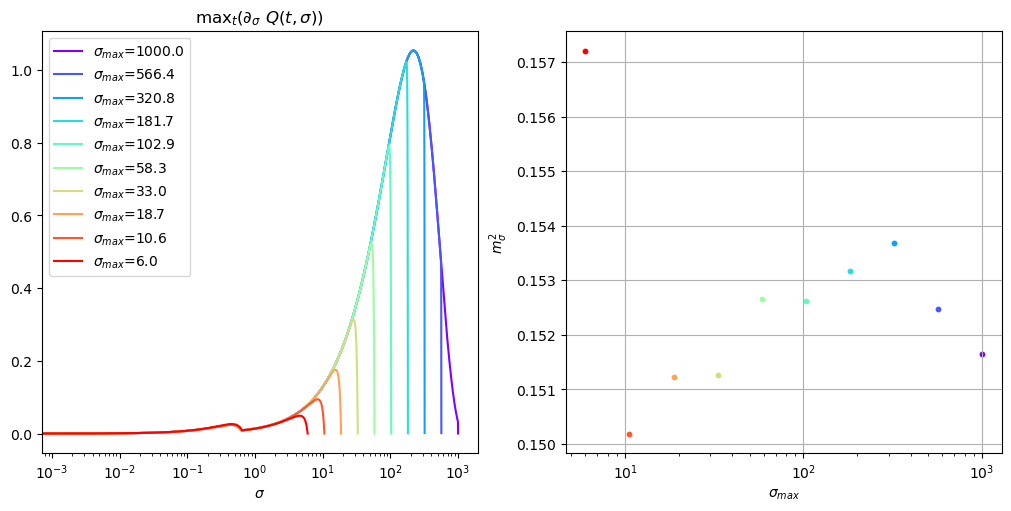

In [35]:
fig, (diffusionPlot, massSquarePlot) = plt.subplots(1, 2, constrained_layout=True ,figsize=(10,5))

all_test = listdir("./sigma_max_test_2000/d_2_2/")
all_test = list(map(lambda x: "./sigma_max_test_2000/d_2_2/"+x, all_test))
sigma_max_values = []
for i, filename in enumerate(all_test):
    with dataClass.FlowData(filename) as f:
        sigma_max_values.append(f.sigma_max)

all_test = zip(all_test, sigma_max_values)
all_test = reversed(sorted(all_test, key = lambda x: x[-1]))
all_test = list(map(lambda x: x[0], all_test))

color = cm.rainbow(np.linspace(0, 1, len(all_test)))

for i, filename in enumerate(all_test):
    with dataClass.FlowData(filename) as f:
        f.plot_max_Q_of_x(diffusionPlot, r'$\sigma_{max}$=' + f'{f.sigma_max:.1f}', color=color[i])
        f.add_massSquare_at_pos(massSquarePlot, color=color[i])
        
diffusionPlot.legend()
diffusionPlot.set_xscale("log")
massSquarePlot.set_xscale("log")
massSquarePlot.grid()

# Plots for different cut-off values

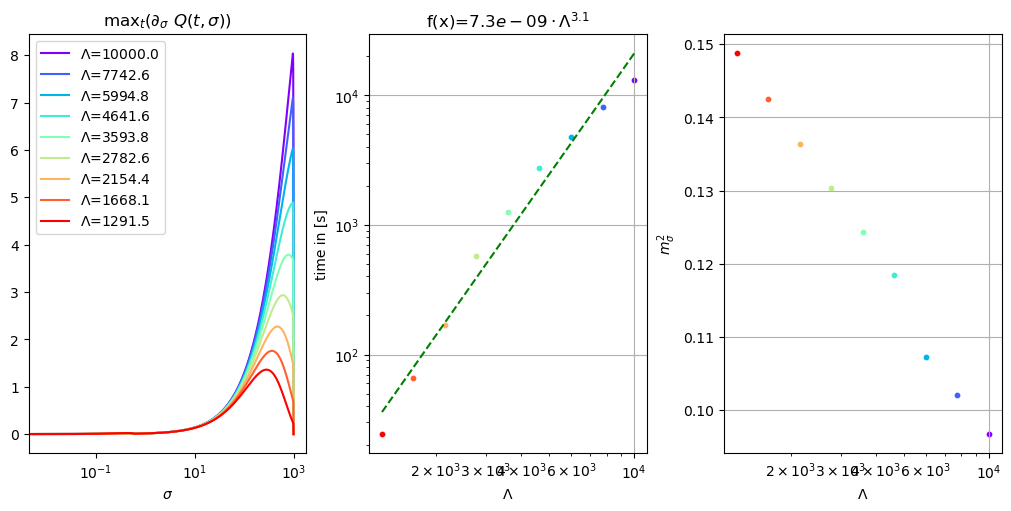

In [108]:
fig, (diffusionPlot, timePlot, massSquarePlot) = plt.subplots(1, 3, constrained_layout=True ,figsize=(10,5))

all_test = listdir("./cutoff_test/d_2_1")
all_test = list(map(lambda x: "./cutoff_test/d_2_1/"+x, all_test))
Lambda_values = []
computation_time_values = []
for i, filename in enumerate(all_test):
    with dataClass.FlowData(filename) as f:
        Lambda_values.append(f.Lambda)
        computation_time_values.append(f.computation_time)

all_test = zip(all_test, Lambda_values)
all_test = reversed(sorted(all_test, key = lambda x: x[-1]))
all_test = list(map(lambda x: x[0], all_test))

color = cm.rainbow(np.linspace(0, 1, len(all_test)))

for i, filename in enumerate(all_test):
    with dataClass.FlowData(filename) as f:
        f.plot_max_Q_of_x(diffusionPlot, r'$\Lambda$=' + f'{f.Lambda:.1f}', color=color[i])
        f.add_computation_time(timePlot, color=color[i])
        f.add_massSquare_vs_Lambda_at_pos(massSquarePlot, color=color[i])
        

# fit computation time axis
def f(x, a, k, C):
    return a * x**k + C

intermediate_functino = zip(Lambda_values, computation_time_values)
intermediate_functino = list(reversed(sorted(intermediate_functino, key = lambda x: x[0])))
Lambda_values = list(map(lambda x: x[0], intermediate_functino))
computation_time_values = list(map(lambda x: x[1], intermediate_functino))

log_lambda_values = np.log10(Lambda_values)
log_computation_time = np.log10(computation_time_values)

coefficients = np.polyfit(log_lambda_values, log_computation_time, 1)
polynomial = np.poly1d(coefficients)
coefficients_retransform = (10**coefficients[-1], coefficients[0])

popt, pcov = curve_fit(f, Lambda_values, computation_time_values)

timePlot.set_title(r'f(x)=$%.1e \cdot \Lambda^{%.1f}$' % tuple(coefficients_retransform))

ys = 10**polynomial(log_lambda_values)
timePlot.plot(Lambda_values, ys, 'g--')

diffusionPlot.legend()
diffusionPlot.set_xscale("log")
timePlot.set_xscale("log")
timePlot.set_yscale("log")
timePlot.grid()
massSquarePlot.set_xscale("log")
massSquarePlot.grid()